# Web Scraping with BeautifulSoup

- Web scraping is a big part of getting novel data
- It used to be easy to access webpages just with html parsers like `BeautifulSoup`
- However, with recent paywalls and javascript being used everywhere, it is no longer as easy to access web resources without increasing the machinery
- So in a sense, today's lecture is kind of less about web-scraping and more about the beauty of APIs.
    - Web scraping is still possible, but it often needs other tools, such as `selenium`, which actually creates a virtual browser that you can simulate clicks with.
    - We can totally do this in our special topics!
- 
- In any case, whether through `BeautifulSoup` or through another library, you still need to understand a little bit of html



Let's look at how to install beautiful soup and then this will be our mission:



## Very Fast HTML 

- HTML is the typesetting language of the web
- It's almost like Latex for browsers
- Nowadays, a lot of the html is created automatically through other coding languages like javascript.
- It isn't important to know the fine details, but for our purposes, HTML comes with tags that have attributes
- When we scrape, we are looking for particular tags, and to hone in on what we want, we usually narrow our search by searching for particular attributes.
- Attributes might be created from CSS, a language that is responsible for the layout and format of the HTML. 
    - So we might search for a particular tag in HTML that has CSS attributes that are from a menu, for example.

![](images/html5_cheat_sheet_tags.png)

First install beautiful soup:

`pip install bs4` 

or

`conda install bs4` (probably)

In [1]:
from bs4 import BeautifulSoup

import re ## For parsing

import requests ## For getting the HTML

from wordcloud import WordCloud, STOPWORDS  ## For fun

import backoff

import matplotlib.pyplot as plt

from selenium import webdriver

import json


### Intro to BeautifulSoup

BeautifulSoup takes the html from webpage and turns into an object that you can work with. All the tags and classes that a webpage have become attributes in a `Soup` object.

In [2]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [3]:
soup = BeautifulSoup(html_doc)
soup

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [4]:
soup.html

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [5]:
soup.head

<head><title>The Dormouse's story</title></head>

In [6]:
soup.title

<title>The Dormouse's story</title>

In [7]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [8]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [9]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

## Now real website!

Let's look at the New york times politics section:

https://www.nytimes.com/section/politics

Seems like a nice look to work from. Let's go to the browser and check what we can see?

In [11]:
## Request the url

url = "https://www.nytimes.com/section/politics"

r= requests.get(url)
r

<Response [200]>

In [13]:
r.text

'<!DOCTYPE html>\n<html lang="en"  xmlns:og="http://opengraphprotocol.org/schema/">\n  <head>\n    <meta charset="utf-8" />\n    \n    \n    \n    <title data-rh="true">U.S. Politics - The New York Times</title>\n    <meta data-rh="true" property="og:description" content="Breaking news and analysis on U.S. politics, including the latest coverage of the White House, Congress, the Supreme Court and more."/><meta data-rh="true" name="description" content="Breaking news and analysis on U.S. politics, including the latest coverage of the White House, Congress, the Supreme Court and more."/><meta data-rh="true" property="twitter:description" name="description" content="Breaking news and analysis on U.S. politics, including the latest coverage of the White House, Congress, the Supreme Court and more."/><meta data-rh="true" property="og:title" content="U.S. Politics"/><meta data-rh="true" property="twitter:title" content="U.S. Politics"/><meta data-rh="true" property="og:image" content="https:

In [19]:
soup = BeautifulSoup(r.text)

In [15]:
soup

<!DOCTYPE html>
<html lang="en" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta charset="utf-8"/>
<title data-rh="true">U.S. Politics - The New York Times</title>
<meta content="Breaking news and analysis on U.S. politics, including the latest coverage of the White House, Congress, the Supreme Court and more." data-rh="true" property="og:description"/><meta content="Breaking news and analysis on U.S. politics, including the latest coverage of the White House, Congress, the Supreme Court and more." data-rh="true" name="description"/><meta content="Breaking news and analysis on U.S. politics, including the latest coverage of the White House, Congress, the Supreme Court and more." data-rh="true" name="description" property="twitter:description"/><meta content="U.S. Politics" data-rh="true" property="og:title"/><meta content="U.S. Politics" data-rh="true" property="twitter:title"/><meta content="https://static01.nyt.com/newsgraphics/images/icons/defaultPromoCrop.png" data-rh=

In [17]:
url_list = []

needed_divs = soup.find_all('article')
for div in needed_divs:
    url_list.append(div.a.get('href'))
    
url_list



['/2023/09/28/us/politics/who-won-debate-republican.html',
 '/2023/09/28/us/politics/government-shutdown-house-republicans.html',
 '/2023/09/27/us/politics/trump-jan-6-chutkan-recusal.html',
 '/2023/09/28/us/politics/biden-trump-michigan.html',
 '/2023/09/28/business/northvolt-battery-factory-quebec.html',
 '/2023/09/28/us/politics/trump-documents-justice-department.html',
 '/2023/09/28/business/economy/shutdown-government-data.html',
 '/2023/09/28/us/politics/desantis-debate-republican.html',
 '/2023/09/28/business/government-shutdown-small-business.html',
 '/video/us/politics/100000009099383/republican-presidential-debate.html',
 '/2023/09/28/us/politics/biden-trump-michigan.html',
 '/2023/09/28/us/politics/biden-mccain-library.html',
 '/2023/09/28/us/politics/government-shutdown-house-republicans.html',
 '/2023/09/28/business/economy/wyoming-clean-energy-investment.html']

Now let's go to each website and do our searches for each candidate. But wait!

### A brief foray into decorators and the `backoff` module

Oftentimes, when you loop through many webpages, the loop might break because you're making too many requests at once. 

That's what `backoff` is for. If the website gives an error, `backoff` will catch the exception and make the request again with some pause. The more times the exception is thrown the longer `backoff` will pause before making another one. 

`backoff` works as a decorator function. What's that? It's basically a function takes a function as an argument, but returns some "wrapper" for that function that references a function in it... What does that mean?

In [21]:
def add():
    print('1+2=3') 

add()


1+2=3


But now you wanted to make sure that people knew that this was a function about addition when they called it. You can write something like this:

In [22]:
def i_want_everyone_to_understand(func):
    
    def that_this_is_addition():
        print("just in case you didn't know, this is addition")
        func()
    return that_this_is_addition

add = i_want_everyone_to_understand(add)

add()

just in case you didn't know, this is addition
1+2=3


Instead of writing out the whole function, we can do:


In [24]:
@i_want_everyone_to_understand
def add():
    print("1+2=3")
    
add()

just in case you didn't know, this is addition
1+2=3


So `backoff` does this samething, but it catches exceptions of your function. So let's make out requests getter a function so we can use `backoff` with it.

In [26]:
def backoff_hdlr(details):
    print ("Backing off {wait:0.1f} seconds after {tries} tries "
           "calling function {target} with args {args} and kwargs "
           "{kwargs}".format(**details))

@backoff.on_exception(backoff.fibo,
                      requests.exceptions.RequestException,
                      on_backoff=backoff_hdlr)
def requester(url):
    # raise requests.exceptions.RequestException
    return requests.get(url)



In [27]:
# Test how this works

requester("")

Backing off 0.3 seconds after 1 tries calling function <function requester at 0x7fc8a0141160> with args ('',) and kwargs {}
Backing off 0.1 seconds after 2 tries calling function <function requester at 0x7fc8a0141160> with args ('',) and kwargs {}
Backing off 1.3 seconds after 3 tries calling function <function requester at 0x7fc8a0141160> with args ('',) and kwargs {}
Backing off 0.7 seconds after 4 tries calling function <function requester at 0x7fc8a0141160> with args ('',) and kwargs {}
Backing off 4.9 seconds after 5 tries calling function <function requester at 0x7fc8a0141160> with args ('',) and kwargs {}
Backing off 1.1 seconds after 6 tries calling function <function requester at 0x7fc8a0141160> with args ('',) and kwargs {}
Backing off 1.4 seconds after 7 tries calling function <function requester at 0x7fc8a0141160> with args ('',) and kwargs {}
Backing off 16.1 seconds after 8 tries calling function <function requester at 0x7fc8a0141160> with args ('',) and kwargs {}
Backing

KeyboardInterrupt: 

Now let's make our loop that gets the content from the webpage:

In [28]:
base_url = "https://www.nytimes.com"

articles = []

for relative_link in url_list:
    site = requester(base_url + relative_link).content
    # Unsuccessful SIMPLE Selenium
    # driver = webdriver.Firefox()
    # driver.get(base_url + relative_link)
    # html = driver.page_source
    # site = BeautifulSoup(html)
    articles.append(site)
    print(f"Accessing {base_url + relative_link}")

Accessing https://www.nytimes.com/2023/09/28/us/politics/who-won-debate-republican.html
Accessing https://www.nytimes.com/2023/09/28/us/politics/government-shutdown-house-republicans.html
Accessing https://www.nytimes.com/2023/09/27/us/politics/trump-jan-6-chutkan-recusal.html
Accessing https://www.nytimes.com/2023/09/28/us/politics/biden-trump-michigan.html
Accessing https://www.nytimes.com/2023/09/28/business/northvolt-battery-factory-quebec.html
Accessing https://www.nytimes.com/2023/09/28/us/politics/trump-documents-justice-department.html
Accessing https://www.nytimes.com/2023/09/28/business/economy/shutdown-government-data.html
Accessing https://www.nytimes.com/2023/09/28/us/politics/desantis-debate-republican.html
Accessing https://www.nytimes.com/2023/09/28/business/government-shutdown-small-business.html
Accessing https://www.nytimes.com/video/us/politics/100000009099383/republican-presidential-debate.html
Accessing https://www.nytimes.com/2023/09/28/us/politics/biden-trump-mi

Now let's sift through and see what we can find. 

In [33]:
BeautifulSoup(articles[0]).html

<html><head><title>nytimes.com</title><style>#cmsg{animation: A 1.5s;}@keyframes A{0%{opacity:0;}99%{opacity:0;}100%{opacity:1;}}</style></head><body style="margin:0"><p id="cmsg">Please enable JS and disable any ad blocker</p><script data-cfasync="false">var dd={'rt':'c','cid':'AHrlqAAAAAMA-U8TIpsw6EkAgFR92Q==','hsh':'499AE34129FA4E4FABC31582C3075D','t':'bv','s':17439,'e':'6625bd127967b85129226697f60005ffc3a9b0eac476facbdc89e58596d6791b','host':'geo.captcha-delivery.com'}</script><script data-cfasync="false" src="https://ct.captcha-delivery.com/c.js"></script></body></html>

- This is the issue with using libraries like `BeautifulSoup`, which are just there to parse through static html: as soon as there's anything *dynamic*, that requires javascript, things become tricky.
- If a website has a paywall or is accessing content dynamically through a server, we can no longer access the content
- But it does seem like we can at least extract article titles!
- Let's backtrack a bit and just scrape each section of the newspaper and extract each article title.

In [35]:
# get just the homepage to extract sections for the newspaper
url = "https://www.nytimes.com/"

r= requests.get(url)

soup = BeautifulSoup(r.text, 'lxml')

li = soup.find_all('li', attrs={'data-testid' : 'mini-nav-item'})

# let's only keep the hrefs that contain the parent "section"
# For cleanliness don't consider absolute hrefs with nytimes.com included
sections = []
for l in li:
    href = l.a.get('href')
    if 'section' in href and base_url not in href:
        sections.append(href)
        
sections

# Can we get the href from each of these?

# import io
# import pandas as pd
# pd.read_html(io.StringIO(section_table))

['/section/world',
 '/section/us',
 '/section/politics',
 '/section/nyregion',
 '/section/business',
 '/section/opinion',
 '/section/science',
 '/section/health',
 '/section/sports',
 '/section/arts',
 '/section/books/review',
 '/section/style',
 '/section/food',
 '/section/travel',
 '/section/magazine',
 '/section/realestate',
 '/section/world',
 '/section/us',
 '/section/politics',
 '/section/nyregion',
 '/section/business',
 '/section/opinion',
 '/section/science',
 '/section/health',
 '/section/sports',
 '/section/arts',
 '/section/books/review',
 '/section/style',
 '/section/food',
 '/section/travel',
 '/section/magazine',
 '/section/realestate']

-  We were able to extract the sections of the NYTimes, now let's try to get the articles titles from each section

In [36]:
articles = []

for i, section_url in enumerate(sections):
    site = requester(base_url + section_url).content
    soup = BeautifulSoup(site)
    needed_divs = soup.find_all('article')
    for div in needed_divs:
        articles.append(div.a.text)


In [37]:
articles

['Russia-Ukraine War: Defense Officials Meet Zelensky in Kyiv to Discuss Military Support',
 'North Korea May Have Seen Little Benefit in Keeping U.S. Soldier',
 'Nagorno-Karabakh Government Says It Will Disband',
 'Dutch Police Report Deadly Shootings in Rotterdam',
 'Gifts, Gadgets and Greece: Inside a Huawei Lobbying Campaign',
 'What to Know About the 2023 Nobel Prizes',
 'M. S. Swaminathan, Scientist Who Helped Conquer Famine in India, Dies at 98',
 'Thursday Briefing',
 'Who’s Gaining Ground in Ukraine? This Year, No One.',
 'Russia Releases New Videos of Admiral Ukraine Claimed to Have Killed',
 'Thursday Briefing: U.S. Soldier Is Out of North Korea',
 'Biden Administration Says Israelis Can Travel to U.S. Without a Visa',
 'Russia Puts Out New Video of Admiral Ukraine Claims to Have Killed',
 'Wednesday Briefing',
 'After Hurricane Ian, Who Will Get to Call This Beach Town Home?',
 'Montana’s Ban on Transition Care for Minors Is Blocked',
 'In El Paso, Migrants With Nowhere to 

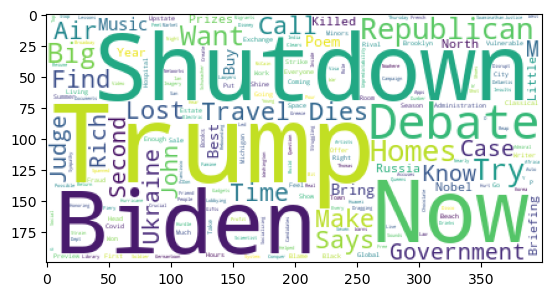

In [41]:
name_text = ' '.join(articles)

stopwords = STOPWORDS.copy()

stopwords.update(['S', 'U', 'Back', "New", 'York', 't', 'Two', 'Review', 'One', 'F', 'Bill', 'Alex', 'Robert', 'N', 'Home', 'Will'])

wordcloud = WordCloud(background_color="white", collocations=False, stopwords=stopwords).generate(name_text)

plt.imshow(wordcloud)

## The Wonderful World of APIs

- Scraping websites should be usually seen as a last resort when there aren't any APIs available
- Websites don't tend to like scraping as it can increases traffic flow and slows down servers
- If a website or company is large enough, they may introduce an API (Application Programming Interface) to let you get information in a way that's a win-win
- Like say... the NY Times!
- Many organizations have APIs and python wrappers are available for those APIs.
- Using the Python packages for APIs are package-specific, but they all revolve around the same underlying structure: making URL queries to the web to extract information.

## Using REST APIs

- Technically, the term API is really a general term for anything that allows for software and eases programming
- Pandas is a library with an API, for instance
- In this case, though, an API is a REST (Representational State Transfer) API interface for making web requests and getting back information (usually in the form of JSON)
- You can break down web queries into three parts: GET, HEAD, PUT, POST, DELETE

![](images/1_R8Li_PHLFdB-VyMtl8G5_w.png)

- We'll really only need GET requests
- To use the NYTimes API, go to: https://developer.nytimes.com/
- Create an account
- Once you log-in go to the top-right, to the dropdown and click "Apps"
- Create a new app
- This will have an API key that you will need
- Under APIs, authorize `Books API`

In [42]:
api_key = "K9jZ2kcQHIucNredNfV7XocRoCj1s1B4"

r = requests.get(f"https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&api-key={api_key}").content

articles = json.loads(r)

In [52]:
articles['response']['docs'][0]['abstract']

'The West Virginia Democrat could run for re-election to the Senate, make a third-party presidential bid or simply retire from politics. To his party’s consternation, he’s not ready to say which.'

In [53]:
# articles turned the json into a dictionary
# you can traverse the dictionary by using the `keys` method
articles.keys()
# extract the titles and lead paragraphs from each article

article_dict = {}

for article in articles['response']['docs']:
    article_dict.update({article['headline']['main'] : article['lead_paragraph']})


In [56]:
article_dict

{'Manchin Mulls His Political Future, Keeping Washington Guessing': 'Senator Joe Manchin III, the conservative West Virginia Democrat, was attending an event in his home state last month when he made a joke that quickly touched off the latest round of feverish speculation about his political future.',
 'G.O.P. Gets the Democratic Border Crisis It Wanted': 'When Gov. Greg Abbott of Texas began sending migrants and asylum seekers from the southwestern frontier to New York, Washington and Chicago, he vowed to bring the border to the Democratic cities he said were naïvely dismissing its costs.',
 'Ramaswamy’s Foreign Policy Approach Offers Rivals a Line of Attack': 'Republican presidential rivals, looking to blunt Vivek Ramaswamy’s rise in national primary polls ahead of the first primary debate on Wednesday, have seized on the political arena where the upstart entrepreneur has strayed far afield from his party’s thinkers: foreign policy.',
 'Ramaswamy Rides Wave of Support, but Rivals Are

In [54]:
def nytimes_search(query):
    api_key = "K9jZ2kcQHIucNredNfV7XocRoCj1s1B4"

    r = requests.get(f"https://api.nytimes.com/svc/search/v2/articlesearch.json?q={query}&api-key={api_key}").content

    return json.loads(r)

In [55]:
nytimes_search('trump')

{'status': 'OK',
 'copyright': 'Copyright (c) 2023 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'abstract': 'Donald J. Trump appeared in court as lawyers for New York’s attorney general, Letitia James, painted him as a fraudster. His lawyers said she was out to get the former president.',
    'web_url': 'https://www.nytimes.com/2023/10/02/nyregion/trump-fraud-trial-letitia-james.html',
    'snippet': 'Donald J. Trump appeared in court as lawyers for New York’s attorney general, Letitia James, painted him as a fraudster. His lawyers said she was out to get the former president.',
    'lead_paragraph': 'The trials of Donald J. Trump began Monday in a New York courtroom, where the former president arrived to fight the first of several government actions — a civil fraud case that imperils his company and threatens his image as a master of the business world.',
    'print_section': 'A',
    'print_page': '1',
    'source': 'The New York Times',
    'multimedia'

## Recap 

- So with the REST API we got what we were looking for!
- REST APIs are everywhere, you just need to find them and see if they are available. This makes extracting information from the web easy.
- The same ideas work for FRED, or twitter (although they might also have python packages, just search google: "python twitter api")
- But sometimes scraping is the only way
    - In that case, be careful, and be a good web-citizen: use backoffs and don't make too many requests, especially if the website is small.